In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ethans/Datasets/heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Dataset Description**

The provided dataset contains information related to heart disease. Each row represents a patient, and the columns represent different features and target variables. Here is an explanation of each column:

age: age in years

sex: (1 = male; 0 = female)

cp: chest pain type

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

target: refers to the presence of heart disease in the patient (1=yes, 0=no)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# No of null/missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [9]:
disease = len(df[df['target'] == 1])
no_disease = len(df[df['target'] == 0])

In [10]:
print("No of diseased: ",disease)
print("No of not diseased: ",no_disease)

No of diseased:  526
No of not diseased:  499


In [11]:
# Categorical - qualitative and Continuos - quantitative columns
qualitative = []
quantitative = []
for feature in df.columns:
  if len(df[feature].unique()) <= 8:
    qualitative.append(feature)
  else:
    quantitative.append(feature)

In [12]:
qualitative

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
quantitative

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.loc[:,['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(df.loc[:,['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


In [17]:
X = df.drop('target',axis = 1)
y = df['target']

In [18]:
X.shape

(1025, 13)

In [19]:
y.shape

(1025,)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (820, 13) (820,)
shape of X and y respectively (test) : (205, 13) (205,)


In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [22]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
y_pred = model.predict(X_test)

In [24]:
print("Training Score: ",model.score(X_train,y_train))
print("Testing Score: ",model.score(X_test,y_test))

Training Score:  1.0
Testing Score:  0.9707317073170731


In [25]:
from sklearn.metrics import accuracy_score

In [26]:
acc = accuracy_score(y_test,y_pred)
print("Accuracy Score: ",acc)

Accuracy Score:  0.9707317073170731


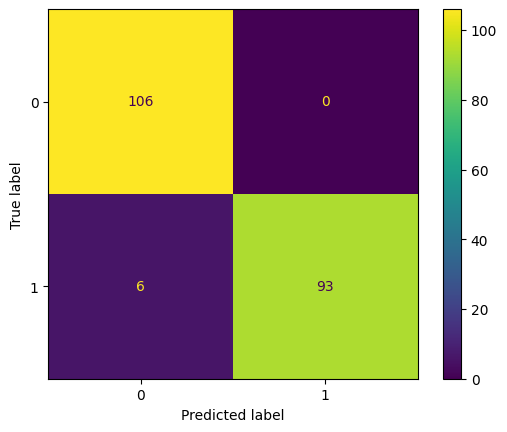

In [27]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [28]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [29]:
parameters = {"criterion":["gini","entropy"],
              "splitter":["best", "random"],
              "max_depth":[1,3,5,7,9],
              "min_samples_split":[2,3,4,6,7],
              "min_samples_leaf":[1,2,3,4,5],
              "max_features":["sqrt","log2",None]
}

In [30]:
tuned_model = GridSearchCV(model,param_grid = parameters,scoring = 'neg_mean_squared_error', cv = 5, verbose = 3)

In [31]:
X = df.drop('target',axis = 1)
y = df['target']

In [32]:
tuned_model.fit(X,y)

Streaming output truncated to the last 5000 lines.
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-0.083 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-0.073 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-0.093 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-0.132 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=-0.098 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=-0.122 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_f

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 6, 7],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [33]:
tuned_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [34]:
tuned_hyper_model = DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [35]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [36]:
tuned_pred = tuned_hyper_model.predict(X_test)

In [37]:
print("Training Score: ",tuned_hyper_model.score(X_train,y_train))
print("Testing Score: ",tuned_hyper_model.score(X_test,y_test))

Training Score:  1.0
Testing Score:  0.9707317073170731


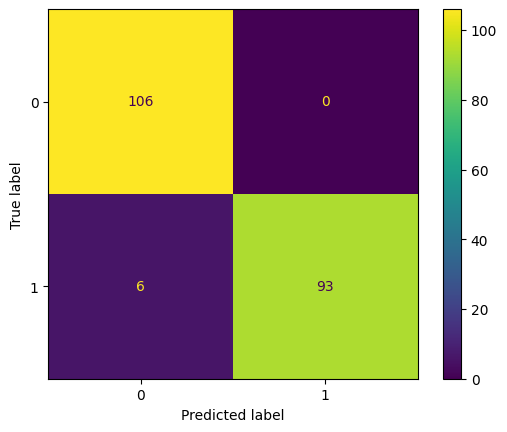

In [38]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, tuned_pred, labels=tuned_hyper_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tuned_hyper_model.classes_)
disp.plot()

In [39]:
acc = accuracy_score(y_test,tuned_pred)
print("Accuracy Score: ",acc)

Accuracy Score:  0.9707317073170731
